# (Prosper Loan Exploration Title)
## by Veris Pflueger-Prasarntree

## Preliminary Wrangling

> Briefly introduce your dataset here. This dataset contains data regarding loans made by Propser, a peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than 18 billion in loans to more than 1,080,000 people. TBorrowers apply online for a fixed-rate, fixed-term loan between 2,000 and 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. 

> https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0 is a list of definitions of the various columns

> https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html is another column name/defintion reference

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
loans = pd.read_csv('prosperLoanData.csv')

loans.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
108153,90DA35970784225263FF53D,1067928,2013-12-04 09:53:28.133000000,NaN,36,Current,NaN,0.21342,0.1765,0.1665,...,-9.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
98285,543E352220788044564B5B2,517028,2011-07-18 16:27:34.597000000,NaN,36,Completed,2012-09-07 00:00:00,0.35643,0.3199,0.3099,...,-69.43,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23
18379,15B23593557385402ADF0D1,995569,2013-11-15 09:22:32.837000000,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,-49.19,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
47469,32CB3559226544310590272,651763,2012-10-08 13:39:26.527000000,NaN,36,Completed,2012-12-12 00:00:00,0.29537,0.2566,0.2466,...,-16.26,0.0,0.0,0.0,0.0,1.0,0,0,0.0,205
15422,11173575945904943CF4144,753821,2013-04-16 05:29:46.407000000,NaN,36,Current,NaN,0.25781,0.2199,0.2099,...,-113.62,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loans.describe().iloc[:,:20]

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,114.000000,0.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,67.000000,680.000000,699.000000,10.000000,9.000000,25.000000,6.00000,271.000000,1.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,137.000000,720.000000,739.000000,13.000000,12.000000,35.000000,9.00000,525.000000,2.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,59.000000,54.000000,136.000000,51.00000,14985.000000,105.000000


In [6]:
loans.describe().iloc[:,20:40]

,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed
count,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000
mean,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961
std,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.310000,880.000000,15.000000,0.820000,0.000000,0.140000,3.200333e+03,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.549000e+03,0.600000,4100.000000,22.000000,0.940000,0.000000,0.220000,4.666667e+03,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000
75%,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.952100e+04,0.840000,13180.000000,30.000000,1.000000,1.000000,0.320000,6.825000e+03,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000
max,379.000000,83.000000,463881.000000,99.000000,38.000000,20.000000,1.435667e+06,5.950000,646285.000000,126.000000,1.000000,20.000000,10.010000,1.750003e+06,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000


In [7]:
loans.describe().iloc[:,40:61]

,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,-35.000000,0.000000,9.000000,6.000000,37332.000000,4000.00000,131.620000,1005.760000,500.890000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,1626.550000,-3.000000,0.000000,14.000000,21.000000,68599.000000,6500.00000,217.740000,2583.830000,1587.500000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,4126.720000,25.000000,0.000000,22.000000,65.000000,101901.000000,12000.00000,371.580000,5548.400000,4000.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,23450.950000,286.000000,2704.000000,44.000000,100.000000,136486.000000,35000.00000,2251.510000,40702.390000,35000.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
loans.shape

(113937, 81)

In [9]:
loans.ListingNumber.value_counts()

951186     6
1057901    4
892845     4
882888     4
1056749    4
          ..
527018     1
1055400    1
549543     1
27302      1
1197292    1
Name: ListingNumber, Length: 113066, dtype: int64

In [10]:
len(loans.ListingKey.value_counts())

113066

### What is the structure of your dataset?

> There are approximately 113,937 rows of data and 81 columns. After checking the length of a list unique Listing Number, it would appear there are 113,066 unique records, as some Listing Numbers have multiple records.

### What is/are the main feature(s) of interest in your dataset?

> ProsperScore, ProsperRating, LoanCurrentDaysDeliquent, EstimatedLoss, and the income related columns, IncomeRange
IncomeVerifiable, StatedMonthlyIncome

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> LoanStatus will definitely be of assistance as it will help divide the data in those who were able to pay off the loan and those who could not pay off the loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

What is the distribution of PercentFunded just to give an idea of how effective Prosper is.

In [11]:
loans.PercentFunded.describe()

count    113937.000000
mean          0.998584
std           0.017919
min           0.700000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.012500
Name: PercentFunded, dtype: float64

Assuming that 1 means 100 percent funded, most seem to be funded given that the 25 percentile is already at 1 and the average percent funded is 99.86 percent.

(array([2.14000e+02, 1.12000e+02, 9.20000e+01, 8.40000e+01, 8.10000e+01,
        7.60000e+01, 7.50000e+01, 4.80000e+01, 5.00000e+01, 1.13105e+05]),
 array([0.7    , 0.73125, 0.7625 , 0.79375, 0.825  , 0.85625, 0.8875 ,
        0.91875, 0.95   , 0.98125, 1.0125 ]),
 <BarContainer object of 10 artists>)

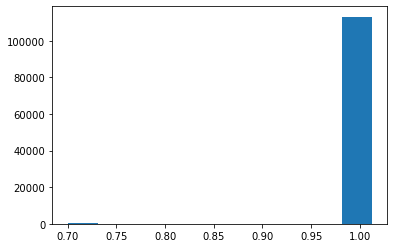

In [12]:
plt.hist(data=loans, x='PercentFunded');

What about the upper and lower range of the credit scores of those who apply for loans via Prosper?

In [13]:
loans.CreditScoreRangeLower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [14]:
loans.CreditScoreRangeUpper.describe()
#np.arange(0, 1, .1)

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

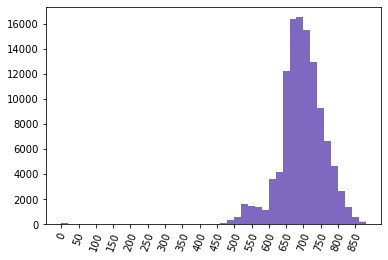

In [15]:
bins = np.arange(0, 900, 20)
plt.hist(data=loans, x='CreditScoreRangeLower', bins=bins, alpha=0.5, label='Lower Range', color='orange')
plt.hist(data=loans, x='CreditScoreRangeUpper', bins=bins, alpha=0.5, label='Upper Range', color='blue')
ticks = np.arange(0, 900, 50)
labels = ['{}'.format(x) for x in ticks]
plt.xticks(ticks, labels, rotation=70);


Reviewing statistical descriptions of the upper and lower range credit scores, and plotting both on a histogram, we can see that with the exception of a lower range of nearly zero, it would appear the lower range of most credit scores is somewhere in the 700, which is still high in general. And that the distributions between both are almost identical.

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
0%            1.000000
10%           1.000000
20%           1.000000
30%           9.000000
40%          26.000000
50%          44.000000
60%          65.000000
70%          95.000000
80%         140.000000
90%         216.000000
max        1189.000000
Name: Investors, dtype: float64


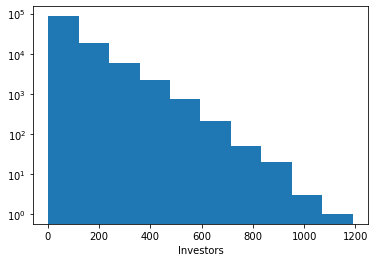

In [16]:
print(loans.Investors.describe(np.arange(0,1,.1)))
plt.hist(data=loans, x='Investors')
plt.yscale('log')
plt.xlabel('Investors')
plt.minorticks_off()

The average amount of investors of 80, however that likely skews due to certain listings that end up several hundred investors. The 50 percent cut off is 44 investors and over 30 percent of investors have fewer than 10 investors and even upward of 80 percent have fewer than 200.

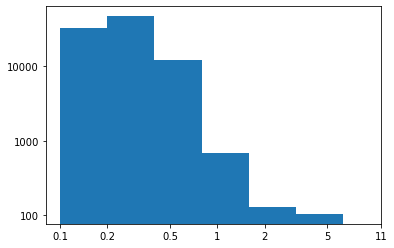

In [17]:
#DebtToIncomeRatio

#print(np.log10(loans.DebtToIncomeRatio.describe()))
#print(loans.DebtToIncomeRatio.describe(np.arange(.9,1, .01)))

debt_bins = 10 ** np.arange(-1, 1, .3)
#print(debt_bins)

debt_ticks = [.1, .2, .5, 1, 2, 5, 11]
debt_labels = ['{}'.format(v) for v in debt_ticks]

plt.hist(data=loans, x='DebtToIncomeRatio', bins=debt_bins)
plt.xscale('log')
plt.yscale('log')
plt.minorticks_off()
plt.yticks([100, 1000, 10000], [100, 1000, 10000])
plt.xticks(debt_ticks, debt_labels);
#plt.yticks(debt_ticks, debt_labels);

In [18]:
print(loans.DebtToIncomeRatio.describe())
loans.query('DebtToIncomeRatio > .86')[['DebtToIncomeRatio']].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64


,DebtToIncomeRatio
count,1047.000000
mean,4.052544
std,3.811556
min,0.870000
25%,1.020000
50%,1.670000
75%,10.010000
max,10.010000


Debt to Income ratio tended not to be very high and is also oddly bimodal. 

Without any kind of transfomation on the y axis, the chart skews heavily. 

After applying logarithmic transformations on both axes, the distribution still skews to the right. By checking the values of where the 99th percentile of the dataset starts, filtering the loans data for all debt ratios above the 99th percentile and then looking at a quick description of that data, we can see that half of the top one percent is still only at a ratio of 1.6 where the max is 10.

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

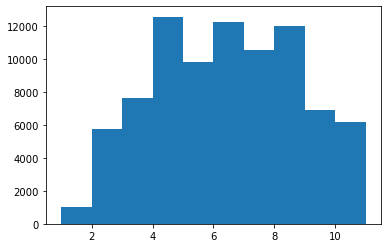

In [19]:
plt.hist(data=loans, x='ProsperScore');
loans.ProsperScore.describe()


The distribution for Prosper Scores, scored from 1 to 10 (1 being most risky, 10 being lowest risk) seems to have normal distribution roughly divided in half.

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

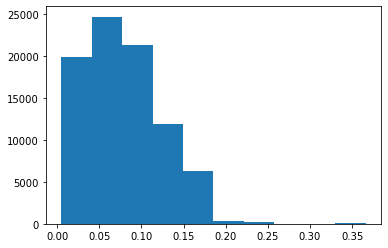

In [20]:
plt.hist(data=loans, x='EstimatedLoss')
loans.EstimatedLoss.describe()


Definitely a right skew on the distribution, with the mean (.08) only being slightly greater than the median (.07).

In [21]:
unpaid = loans.query("LoanStatus.str.contains('Past Due') or LoanStatus == 'Defaulted' or LoanStatus == 'Chargedoff'", 
                     engine='python')

In [22]:
unpaid.query('PercentFunded < 1')[['PercentFunded','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_GrossPrincipalLoss','LoanOriginalAmount','LoanStatus']].sample(10)

# LoanOriginalAmount * PercentFunded - LP_CustomerPrincipalPayments = LP_GrossPrincipalLoss
# Actual Loss = LP_GrossPrincipalLoss / LoanOriginalAmount

,PercentFunded,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LoanOriginalAmount,LoanStatus
26787,0.7449,2969.71,1549.76,1430.07,2980,Chargedoff
55801,0.9135,6639.24,3892.08,2959.34,6851,Chargedoff
92285,0.8399,1268.10,514.20,2845.58,3360,Chargedoff
9419,0.7458,0.00,0.00,5593.66,5594,Chargedoff
32269,0.7024,7195.20,3299.40,0.00,9132,Past Due (1-15 days)
69641,0.8047,1116.80,255.71,6584.32,6840,Defaulted
3641,0.7798,5924.52,1863.39,5934.89,7798,Chargedoff
60288,0.8001,5635.68,1897.24,10105.68,12003,Chargedoff
47350,0.8977,2784.76,1433.92,4850.20,6284,Chargedoff
71985,0.8515,1971.76,678.76,5282.28,5961,Chargedoff


It may be useful to have a row indicating actual loss to be able to compare with estimated loss, among other variables. This column can be populated by dividing LP Gross Principal Loss by Loan Original Amount for every loan that has a Loan Status of ChargedOff or Defaulted. Due to definitions of Past Due, loans that are past due do not have a listed LP Gross Principal Loss.

In [23]:
loans['ActualLossRate'] = loans.apply(lambda x: x['LP_GrossPrincipalLoss']/x['LoanOriginalAmount'] 
                                      if x['LoanStatus'] in ['Chargedoff','Defaulted'] else np.nan, axis=1)

loans.query('LoanStatus == "Defaulted" or LoanStatus == "Chargedoff"')[['ActualLossRate']].sample(5)

,ActualLossRate
5961,0.592580
16436,0.679580
102263,1.000000
39757,1.000000
78350,0.387727


$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


''

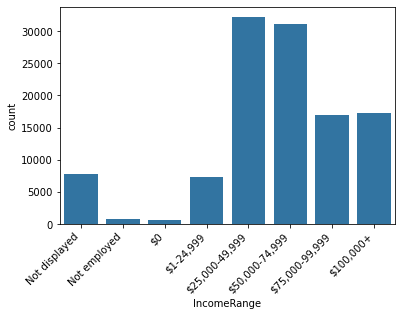

In [24]:
#IncomeRange
#IncomeVerifiable
#StatedMonthlyIncome

loans.IncomeRange.describe()
print(loans.IncomeRange.value_counts())
order=['Not displayed','Not employed', '$0','$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999',
       '$100,000+']
base_c = sns.color_palette()[0]
sns.countplot(data=loans, x="IncomeRange", order=order, color=base_c)
plt.xticks(rotation=45, ha='right')
;

A good majority of the income range of borrowers is below 74,999 dollars while there is still a substantial number who have incomes above 100,000.

In [25]:
loans.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

Though some of the Incomes are verifiable and therefore it may be useful to sceen for loans whose borrowers had verifiable income.

In [26]:
loans.StatedMonthlyIncome.describe().round(3)

count     113937.000
mean        5608.026
std         7478.497
min            0.000
25%         3200.333
50%         4666.667
75%         6825.000
max      1750002.917
Name: StatedMonthlyIncome, dtype: float64

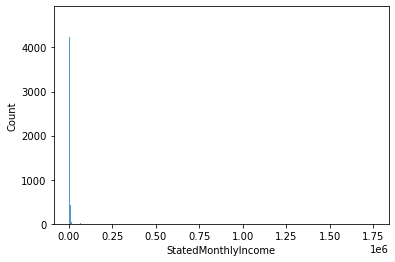

In [27]:
sns.histplot(data=loans, x='StatedMonthlyIncome');

There is likely a large skew here due to high incomes. Removing the highest incomes will likely give a better idea of the distribution of stated monthly income.

count    5.052298
mean     3.725932
std      3.497279
min          -inf
25%      3.500602
50%      3.661181
75%      3.823909
max      4.311754
Name: StatedMonthlyIncome, dtype: float64


C:\Users\veris\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


''

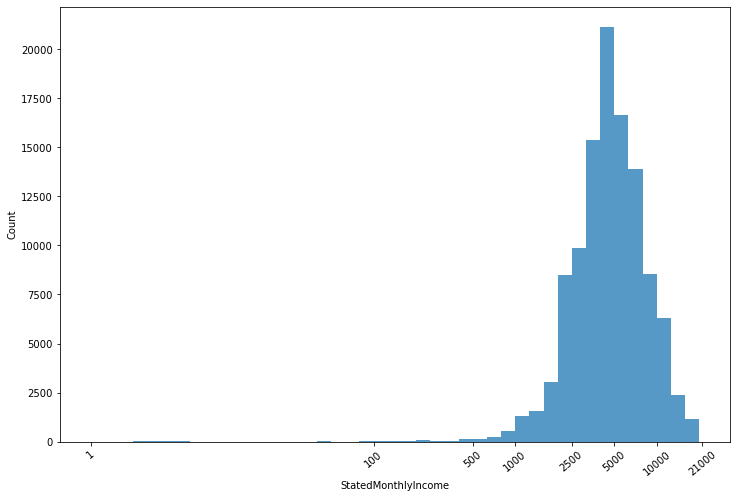

In [28]:
upper_percentile = loans.StatedMonthlyIncome.describe(np.arange(0,1,.01)).round(3).loc['99%']

no_one_percenters = loans[loans['StatedMonthlyIncome'] < upper_percentile]

print(np.log10(no_one_percenters.StatedMonthlyIncome.describe()))

plt.figure(figsize=(12,8))
bins = 10 ** np.arange(0, 4.3+0.1, 0.1)
sns.histplot(data=no_one_percenters, x='StatedMonthlyIncome', bins=bins)

# Generate the x-ticks you want to apply
ticks = [1, 100, 500, 1000, 2500, 5000, 10000, 21000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.xscale('log')
plt.minorticks_off()
plt.xticks(ticks, labels, rotation=40)
;

This gives us a better distribution and which stated monthly income is the average, after excluding the top 1 percent.

Let's take an initial look at the LoanStatus column, which contains the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue (The PastDue status will be accompanied by a delinquency bucket) in terms of relative frequencies, to see the distribution of the different statuses. 

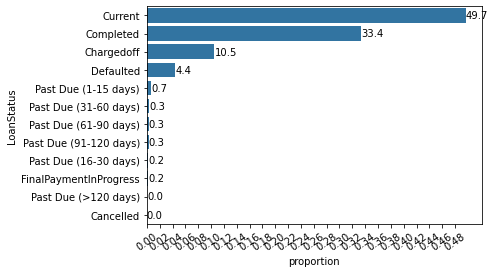

In [29]:
#bar chart of LoanStatus
status_counts = loans.LoanStatus.value_counts()
n_status = status_counts.sum()

max_status = status_counts[0]

max_prop = max_status / n_status

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sns.color_palette()[0]
status_order = status_counts.index

sns.countplot(data=loans, y='LoanStatus', color=base_color, order=status_order);

# Change the tick locations and labels
plt.xticks(tick_props * n_status, tick_names, rotation=35)
plt.xlabel('proportion')

for i in range (status_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = status_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_status)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center');


As indicated in the variable definitions, Past Due rows are separated out and binned. It will likely be useful to collapse those into one variable and move the bins to a separate column. This is to get a sense of how many are Past Due without regard to how overdue they are. 

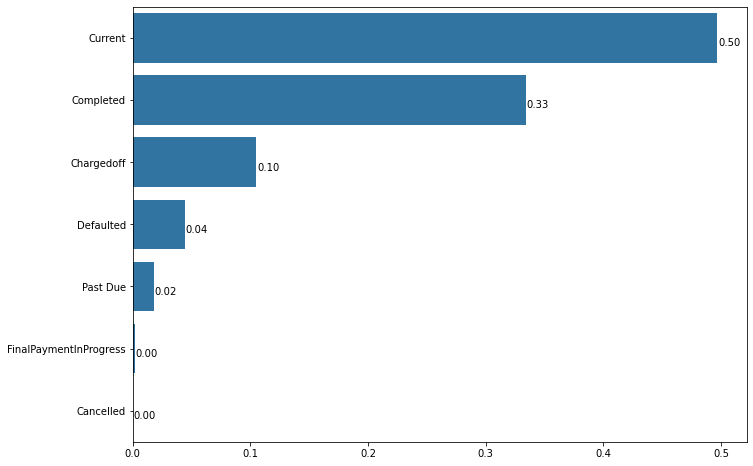

In [30]:
status_counts = loans.LoanStatus.value_counts()
past_due = 0

for i, v in status_counts.iteritems():
    if 'Past Due' in i:
        past_due += v

status_counts['Past Due'] = past_due
new_status_counts = status_counts[['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due']]

total = new_status_counts.sum()
n_status = new_status_counts

prop_status_counts = new_status_counts.apply(lambda x: round(x/total, 3))
prop_status_counts.sort_values(ascending=False, inplace=True)

base_color = sns.color_palette()[0]

plt.figure(figsize=(11,8))
sns.barplot(x = prop_status_counts.values, y = prop_status_counts.index, order=prop_status_counts.index,
            color=base_color)

for i in range (prop_status_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = prop_status_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.2f}'.format(count)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+0.0005, i, pct_string, va='top');


This bar plot of the proportions of each loan status shows that half the loans as of the dataset date are outstanding, a third were paid off, while the rest are are defaulted, charged off, or past due (all of which are non-payments of the loan). While the bottom two percentages are zero, this is due to rounding to two decimal places, e.g., the Cancelled rate is seen at five decimal places.

For further explanatory analysis, we can likely separate the loans data into three dataframes for Current, Completed / Final Payment In Progress, and Charged Off / Defaulted / Past Due

In [31]:
loans.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [32]:
completed = loans.query("LoanStatus == 'Completed' or LoanStatus == 'FinalPaymentInProgress'")
current = loans[loans['LoanStatus'] == 'Current']
unpaid = loans.query("LoanStatus.str.contains('Past Due') or LoanStatus == 'Defaulted' or LoanStatus == 'Chargedoff'", 
                     engine='python')

After creating the three separate dataframes, a quick spot check to ensure each are correct.

In [33]:
unpaid.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualLossRate
20173,5B8A33654944181091DDB5A,25093,2006-07-17 10:37:05.640000000,C,36,Defaulted,2008-06-28 00:00:00,0.14508,0.1380,0.1280,...,0.00,3800.87,3800.88,1684.02,1.0,0,0,0.0,110,0.542981
27534,35193570792300711E58EAC,712893,2013-02-12 11:43:57.440000000,NaN,60,Chargedoff,2014-02-20 00:00:00,0.26877,0.2432,0.2332,...,0.00,3738.16,3738.16,0.00,1.0,0,0,0.0,63,0.934540
83059,C8FA35287811492152CB8A3,532031,2011-10-11 18:41:54.473000000,NaN,36,Chargedoff,2012-05-20 00:00:00,0.29510,0.2599,0.2499,...,-5.10,1924.96,1924.96,0.00,1.0,0,0,0.0,34,0.962480
65508,ABA83387941498734DFA643,128252,2007-04-24 17:26:51.240000000,HR,36,Chargedoff,2007-12-07 00:00:00,0.22767,0.2090,0.1890,...,-5.88,918.55,918.55,65.00,1.0,0,0,0.0,40,0.918550
7138,ED183374676142857877357,70898,2006-12-05 18:18:47.760000000,B,36,Chargedoff,2009-12-19 00:00:00,0.13403,0.1270,0.1220,...,0.00,1951.85,1951.85,0.00,1.0,0,0,0.0,186,0.162654
84643,209D3402404309616E91347,210624,2007-10-03 16:37:58.450000000,HR,36,Chargedoff,2009-06-17 00:00:00,0.25617,0.2410,0.2310,...,0.00,6584.19,6584.20,0.00,1.0,6,3,600.0,146,0.665070
31286,6AE433726766238970313C5,58675,2006-11-07 23:59:31.150000000,E,36,Chargedoff,2009-03-16 00:00:00,0.30300,0.2900,0.2850,...,0.00,693.79,693.79,0.00,1.0,0,0,0.0,20,0.462527
30276,7031342248445210291EE75,344384,2008-06-04 12:23:39,A,36,Chargedoff,2009-11-13 00:00:00,0.18454,0.1700,0.1600,...,-242.76,15208.98,6891.89,8394.91,1.0,0,0,0.0,370,0.760449
59129,C7BB35171350081773F2E53,507936,2011-05-22 08:27:06.647000000,NaN,60,Chargedoff,2012-06-21 00:00:00,0.32958,0.3049,0.2949,...,-179.02,9703.53,9703.53,500.00,1.0,0,0,0.0,97,0.970353
75467,8F713378754044030D53DD8,84806,2007-01-14 02:50:12.570000000,HR,36,Chargedoff,2008-11-25 00:00:00,0.26641,0.2588,0.2238,...,0.00,1584.15,1584.17,0.00,1.0,0,0,0.0,58,0.621235


In [34]:
unpaid.shape

(19077, 82)

In [35]:
current.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualLossRate
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,NaN
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,NaN
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN


In [36]:
current.shape

(56576, 82)

In [37]:
completed.sample(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ActualLossRate
22024,EAF23402804763307C6FCC8,213390,2007-10-09 15:53:24.870000000,B,36,Completed,2009-11-18 00:00:00,0.23246,0.2250,0.2150,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,79,NaN
50566,1E9F35552372086255118DA,626550,2012-08-20 11:00:52.403000000,NaN,36,Completed,2013-07-15 00:00:00,0.35797,0.3177,0.3077,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,12,NaN
108291,E37F340172320932720200E,213324,2007-10-09 14:13:44.820000000,C,36,Completed,2009-06-03 00:00:00,0.21975,0.2100,0.2000,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,78,NaN
64441,C2693400263110661D5A93E,203475,2007-09-18 16:31:58.653000000,AA,36,Completed,2008-01-28 00:00:00,0.12700,0.1200,0.1150,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,362,NaN
110768,F81F3391318148480156533,145187,2007-05-31 16:30:54.793000000,B,36,Completed,2010-02-17 00:00:00,0.10441,0.0975,0.0875,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,165,NaN
58819,20A234299370290397AE412,388457,2008-08-26 08:57:47.843000000,B,36,Completed,2010-09-17 00:00:00,0.21480,0.2000,0.1900,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,338,NaN
61952,CE7B3514169835334A5170D,504340,2011-04-28 05:36:42.020000000,NaN,36,Completed,2012-02-07 00:00:00,0.17160,0.1499,0.1399,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,146,NaN


In [38]:
completed.shape

(38279, 82)

Let's start on the unpaid dataset to get an idea of people who default on their loans.

In [39]:
unpaid[["ListingKey", "AmountDelinquent", "CreditScoreRangeLower", "CreditScoreRangeUpper", "DebtToIncomeRatio"]]

,ListingKey,AmountDelinquent,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio
12,0F1A3597143888805163EF7,0.0,680.0,699.0,0.18
15,0F483544120452347F48121,0.0,700.0,719.0,0.49
17,0FDF336575182398852A8DC,NaN,760.0,779.0,0.12
23,101B35764008108187B2EBA,0.0,680.0,699.0,0.39
42,10AD33803102786533722BB,NaN,520.0,539.0,0.27
...,...,...,...,...,...
113904,C97434024964924789B94BC,0.0,640.0,659.0,0.55
113905,C97E35311333117565C8E84,0.0,740.0,759.0,0.35
113914,D20533652658825353F6597,NaN,520.0,539.0,0.05
113918,D207342464194217591D1E1,0.0,740.0,759.0,0.39


Feature engineering to clean up the LoanStatus column so that all Past Due loans are now under one value. The past due day bins are moved to a second column.

In [40]:
#backing up loans dataset
loans_c = loans.copy()

#putting the past due bin day groups into a separate column in case the value is later needed
loans['PastDueBin'] = loans['LoanStatus'].apply(lambda x: x.split("(")[1][:-1] if len(x.split("(")) > 1 else np.nan)

#removing the past due bin day groups from the LoanStatus column
loans['LoanStatus'] = loans['LoanStatus'].apply(lambda x: x.split("(")[0].strip())

loans.LoanStatus.value_counts()



Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The income ranges and even higher level incomes of people who used Prosper was surprising, although the actual income range was consistent between the two variables. When looking at StatedMonthlyIncome, it was useful to transform the income amount to provide a more even view of the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The DebtToIncome ratio was oddly bimodal and was either very high or very low. While minimal feature engineering was performed, it may be necessary on the LoanStatus column to have all Past Due rows counted together.

Thinking it would be useful to see how accurate the Esitimated Loss was, I determined Actual Loss by dividing LP_GrossPrincipalLoss by LoanOriginalAmount for all entries where the status was Defaulted or Charged Off.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [41]:
print(np.log10(loans.StatedMonthlyIncome.describe()))


count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64


C:\Users\veris\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


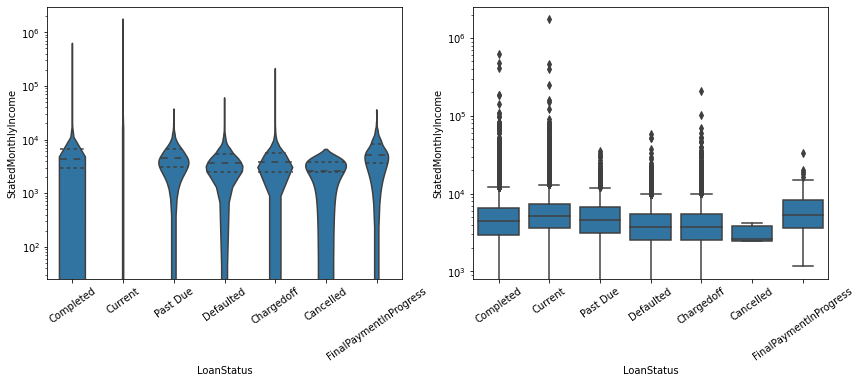

In [42]:
# apply Loanstatus (categorical) to StatedMonthlyIncome(discrete numerical)

plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
sns.violinplot(data=loans, x='LoanStatus', y='StatedMonthlyIncome', color=base_c, inner='quartile')
plt.xticks(rotation=35)
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(data=loans, x='LoanStatus', y='StatedMonthlyIncome', color=base_c)
plt.xticks(rotation=35)
plt.yscale('log');


Here we can se that the median and first and third percentiles of StatedMonthlyIncome for the various loan statuses do not vary significantly excepf for those with the Final Payment in Progress. Indeed the StatedMonthlyIncome for those who completed their loans and those who are past due or defaulted are almost the same.

In [43]:
loans.EstimatedLoss.describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

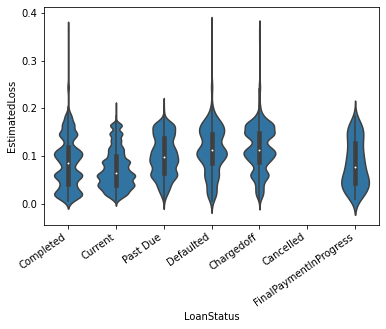

In [44]:
#violin plot of Estimated Loss and Loan Status

sns.violinplot(data=loans, x='LoanStatus', y='EstimatedLoss', color=base_c, innter='quartile')
plt.xticks(rotation=35, ha='right');

Estimated Loss was a bit higher in the unpaid loans versus the completed or about to be completed loans.

Here I compare estimated loss (Estimated loss is the estimated principal loss on charge-offs)  and the Actual Loss Rate (calculated by LP_GrossPrincipalLoss by LoanOriginal amount). Using a scatterplot comparing Estimated Loss by Net Principal Loss (The principal that remains uncollected after any recoveries) isn't as clear as the Net Principal Loss could vary depending on the actual Loan Original Amount.

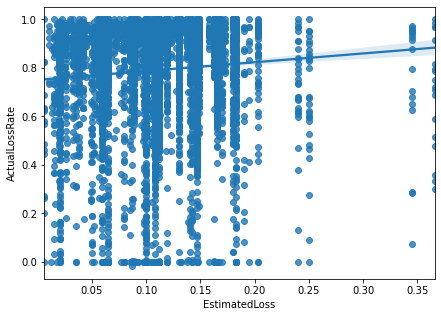

In [45]:
#scatter plot and regression line for Estimated Loss and Actual Loss Rate
plt.figure(figsize = [7, 5])
sns.regplot(data=loans, x='EstimatedLoss', y="ActualLossRate");

In [46]:
loans.query("ActualLossRate > .8").ActualLossRate.describe()

count    8794.000000
mean        0.913511
std         0.057006
min         0.800008
25%         0.867118
50%         0.919410
75%         0.962650
max         1.000027
Name: ActualLossRate, dtype: float64

While the comparison to Estimated Loss to Actual Loss is positive, the amount of high actual loss seems incredibly high across a range of Estiamted Loss. 

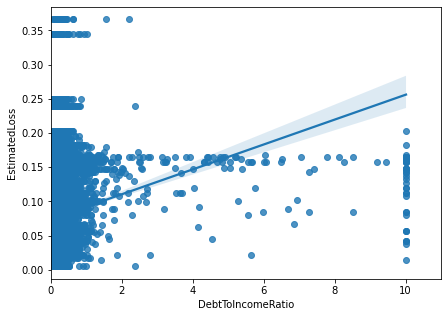

In [47]:
#scatter plot debttoincomeratio and estimated loss

plt.figure(figsize = [7, 5])
sns.regplot(data=loans, x='DebtToIncomeRatio', y='EstimatedLoss')
plt.xlim(right=11);

While there is a positive correlation between Estimated Loss and the Debt to Income ratio, it does not seem impressively strong. Indeed we can see that there were both high and low estimated loss rate with a low debt to income ratio. Similarly there are low to mid levels of estimated loss at the highest debt to income ratio. While it appears interesting that there is no high estimated loss once the debt to income ratio passes 3, it is also good to know that there are not many loans with that high a ratio.

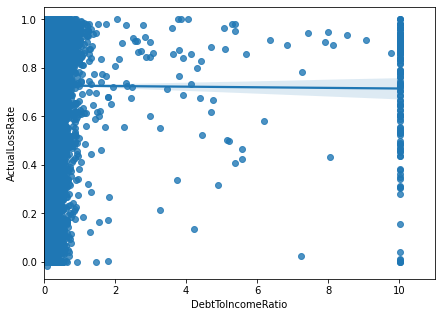

In [48]:
plt.figure(figsize = [7,5])
sns.regplot(data=loans, x='DebtToIncomeRatio', y='ActualLossRate')
plt.xlim(right=11);

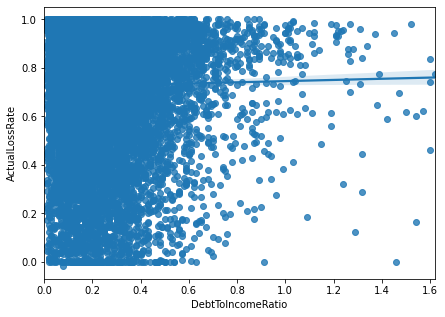

In [49]:
plt.figure(figsize = [7,5])
sns.regplot(data=loans.query('DebtToIncomeRatio < 1.67'), x='DebtToIncomeRatio', y='ActualLossRate');
#plt.xlim(right=11);

Regardless of debt to income ratio, there does not seem to be an affect on the actual loss rate. The ability to pay off a loan is not strongly correlated to high debt, though for paid off debts, they tend to be lower on the debt range and there are more points of higher losses in high debts ratios. 

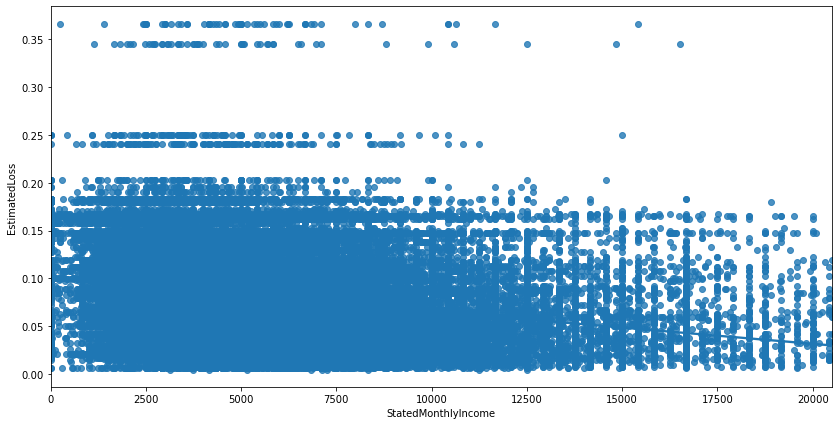

In [50]:
#scatter plot of stated monthly income and estimated loss

plt.figure(figsize = [14,7])
sns.regplot(data=no_one_percenters, x='StatedMonthlyIncome', y='EstimatedLoss');
#plt.xlim(right=.4);

The chart is very sparse and that is likely due to the outlier of the very high income. By removing the top 1 percent of StatedMonthlyIncome we see a much larger chart.

The regression line is almost lost among the data points, but it shows a slight negative correlation, which stands to reason that the higher one's Started Monthly Income, the lower the Estimated Loss.

Given that there are also datapoints of high Estimated Loss among the higher Stated Monthly Income, it seems almost certain that there are other factors besides income that are used to estimate loss.


count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64


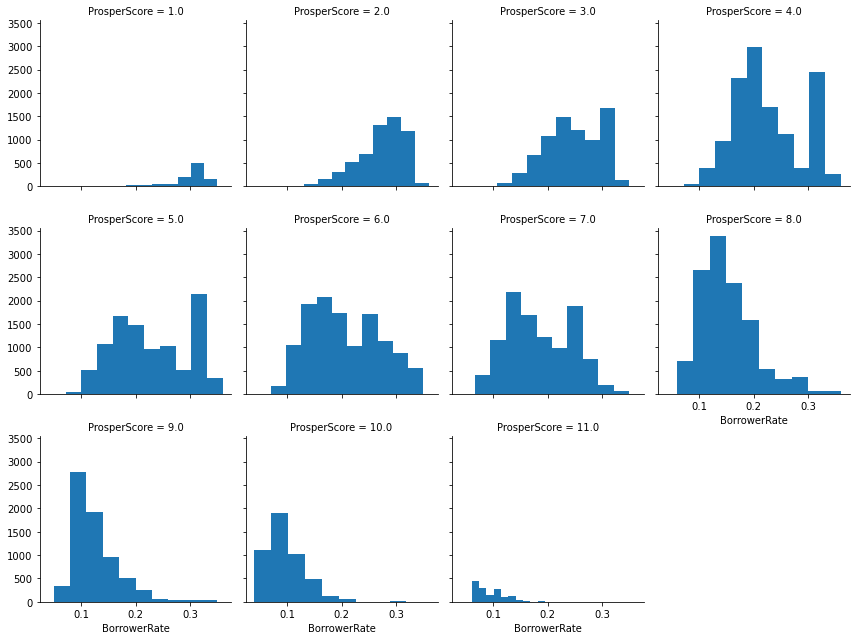

In [51]:
#clustered bar chart with prosperscore and borrower rate
# average rate per prosperscore?
# or hist plot with prosperscore

print(loans.BorrowerRate.describe())

#step 2 chart initial to see if log transformation of borrower rate makes sense

g = sns.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "BorrowerRate");



We can see as the Prosper Score goes up, the skewing shifts initially from a left skew to a rightward skew, indicating generally that the lower scores have higher Borrower Rates, suggesting higher risk, and high prosper scores have lower Borrower Rates, suggesting lower risk. 

In [ ]:
g = sns.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "ActualLossRate");

In [ ]:
g = sns.FacetGrid(data = loans, col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "EstimatedLoss");

In [52]:
list(loans.LoanStatus.value_counts().index)

['Current',
 'Completed',
 'Chargedoff',
 'Defaulted',
 'Past Due',
 'FinalPaymentInProgress',
 'Cancelled']

In [53]:
score_order = list(loans.ProsperScore.value_counts().sort_index().index)

"g.map(sns.barplot, 'interval', 'value', order=times)"

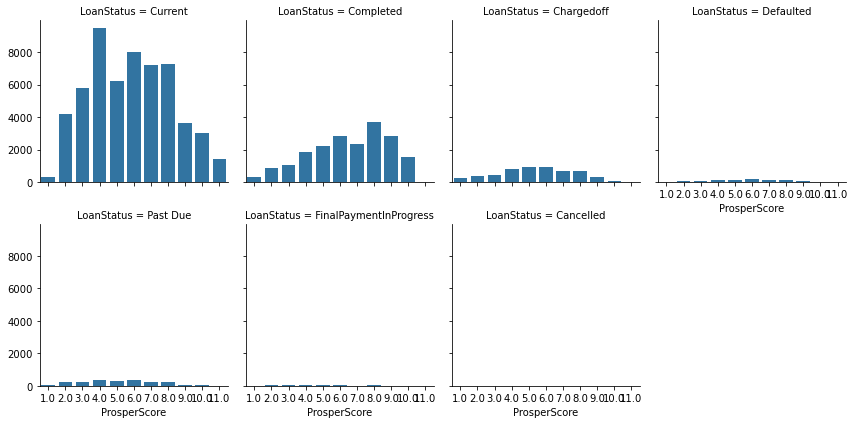

In [54]:
#facet bar plot with prosperscore and loanstatus

# Convert the "LoanStatus" column from a plain object type into an ordered categorical type
statuses = list(loans.LoanStatus.value_counts().index)
loan_statuses = pd.api.types.CategoricalDtype(ordered=False, categories=statuses)
loans['LoanStatus'] = loans['LoanStatus'].astype(loan_statuses);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = loans, col = 'LoanStatus', col_wrap=4, margin_titles = True)
g.map(sns.countplot, "ProsperScore", order=score_order);

"""(x = prop_status_counts.values, y = prop_status_counts.index, order=prop_status_counts.index,
            color=base_color)"""

'''g.map(sns.barplot, 'interval', 'value', order=times)'''

When looking at the PropserScore across each Loan type, the distribution appears normal and it does not seem like any one or range of ProsperScores is more represented in Past Due or Defaulted loans.

In [1]:
g = sns.FacetGrid(data = loans.query('DebtToIncomeRatio < 1.67'), col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(plt.hist, "DebtToIncomeRatio");

NameError: name 'sns' is not defined

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> While EstimatedLoss is naturally higher for unpaid loans, as there is actual loss. The Actual Loss Rate is high across all the Estimated Losses, even though the relation between Estimated Loss and Actual Loss Rate is positive. Similar to Estimated Loss and Debt To Income Ratio, there were both high and low estimated loss rate with a low debt to income ratio. Similarly there are low to mid levels of estimated loss at the highest debt to income ratio. Another weak relationship can be seen between Estimated Loss and Stated Monthly Income, which as negative makes sense, however, the correlation is fairly weak and median to high Estimated Loss can be seen across the range of Stated Monthly Income.

> Another sensible relationship can be seen between Prosper Score and the Borrower Rate, as the Prosper Score goes up, the skewing shifts initially from a left skew to a rightward skew, indicating generally that the lower scores have higher Borrower Rates, suggesting higher risk, and high prosper scores have lower Borrower Rates, suggesting lower risk. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

variables used above:

Numerical
* Actual Loss Rate
* Estimated Loss
* Stated Monthly Income
* Borrower Rate
* Debt to Income Ratio

Qualitative
* Loan Status
* Prosper Score
* Income Range

Possible ideas for visualizations:
scatter plot debttoincomeratio and estimated loss with loan status category
borrower rate hist plot divided by prosperscore with estimated loss?

As Actual Loss Rate only exists for loans that have defaulted, it should not be used with LoanStatus to ensure no empty graphs



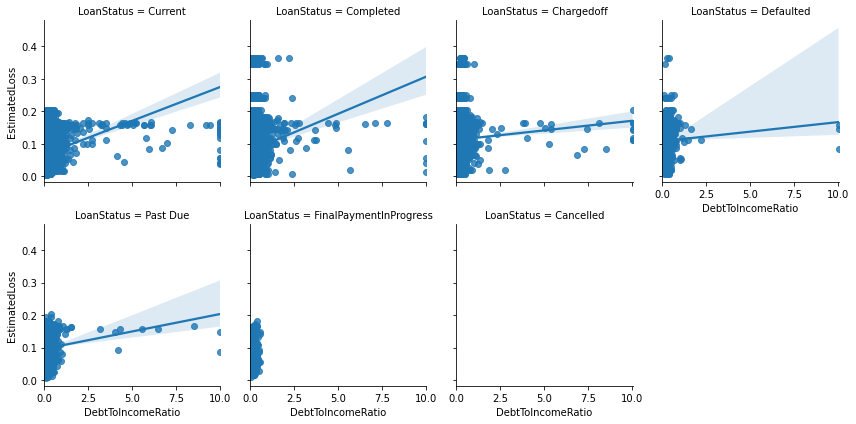

In [55]:
# debttoincomeratio, estimated loss numerical
# loan status category 

# two numerical variables and a category means we can use a facet grid with scatter plots

g = sns.FacetGrid(data = loans, col = 'LoanStatus', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'DebtToIncomeRatio', 'EstimatedLoss');




In looking at scatter plots to see How Debt To Income Ratio correlates to Estimated Loss broken out by Loan Status (essentially to see how well the debt to income ratio affected estimated loss and how each loan subsequently fared), the scatter plots are quite large, as the ratio goes out to 10. Recalling from the univariate analysis of Debt to Income Ratio, we saw that even the upper 99% of .86 and that even half of the top 1% was only 1.67. We can exclude the outliers beyond 1.67 percent and perhaps see a more reasonable plot.

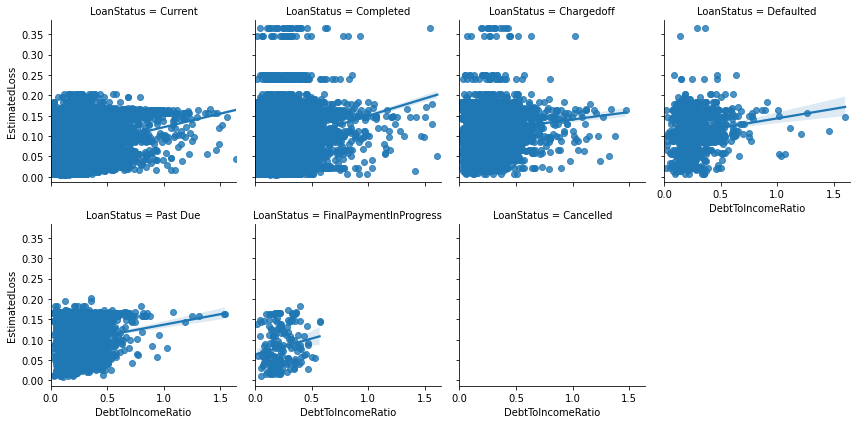

In [56]:
g = sns.FacetGrid(data = loans.query('DebtToIncomeRatio < 1.67'), col = 'LoanStatus', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'DebtToIncomeRatio', 'EstimatedLoss');

After removing outlier debt to income ratios, the scatter plots are more clear and the actual correlations are clearly not significant and that the debt to income ratio has no strong correlations despite the borrower's ability to pay off the loan. We do not see much difference between the debt to income ratio and the estimated loss for charged off or defaulted loans versus current or nearly paid off loans in terms correlation between the two variables. 

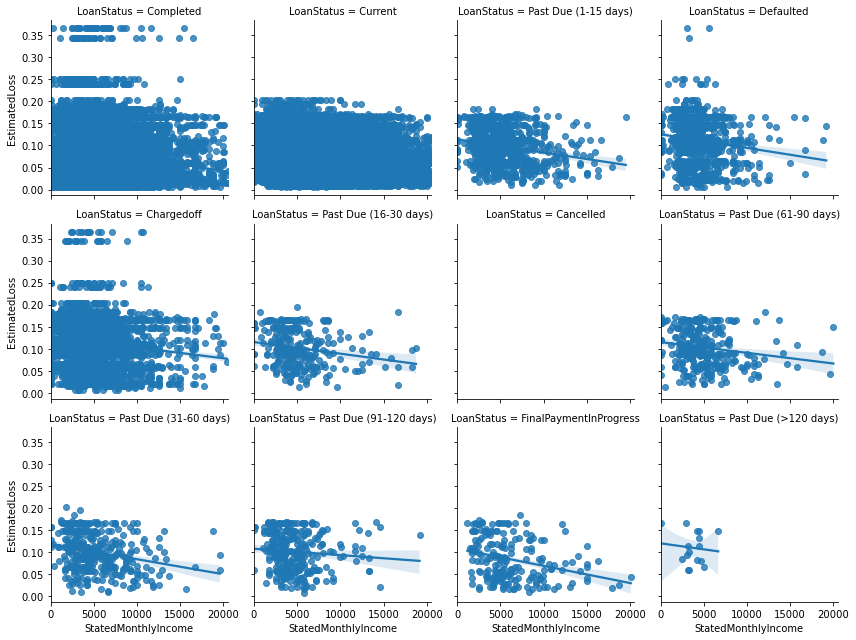

In [57]:
g = sns.FacetGrid(data = no_one_percenters, col = 'LoanStatus', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'StatedMonthlyIncome', 'EstimatedLoss');

A negative correlation betwen Stated Monthly Income and Estimated Loss is reasonable as the higher the Stated Monthly Income, the more likely the borrower has the capability to pay the loan and the lower the Estimated Loss. It is also reasonable that this correlation is simlar despite the actual disposition of the loan, suggesting that the Stated Monthly Income and the Estimated Loss is not necessarily indicators of whether a loan may be repaid.

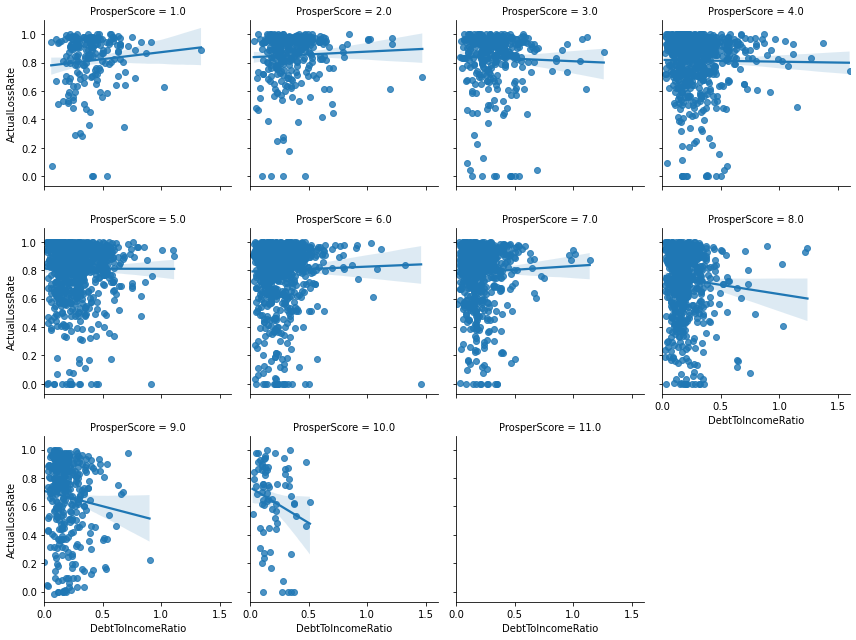

In [58]:
g = sns.FacetGrid(data = loans.query('DebtToIncomeRatio < 1.67'), col = 'ProsperScore', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'DebtToIncomeRatio', 'ActualLossRate');

Here rather than see the estimated loss, we can look at the Actual Loss Rate and compare it to the Debt to Income Ratio for each level of Prosper Score, a custom risk score. One aspect that can be immediately observed is that the correlation between the Debt to Income Ratio and the Actual Loss Rate goes from neutral with lower Propser Scores and turns negative with the high end of Prosper Scores, from 8 onward. This suggests the Prosper Score has viability in determining whether the loan may be paid back. 

For Prosper Scores 8 to 10, even as the Debt to Income Ratio increased, the Actual Loss Rate did not increase. Unlike the Prosper Scores 1 to 3, where even with low Debt to Income Ratios, the Actual Loss Rates are generally still high. Though the correlation is neutral, we can see the concentration of data points is focused in high Actual Loss Rates even for low Debt to Income Ratios. As the Prosper Score increases, we see more data points in the low end of Actual Loss Rates, even as the correlation stays neutral. 

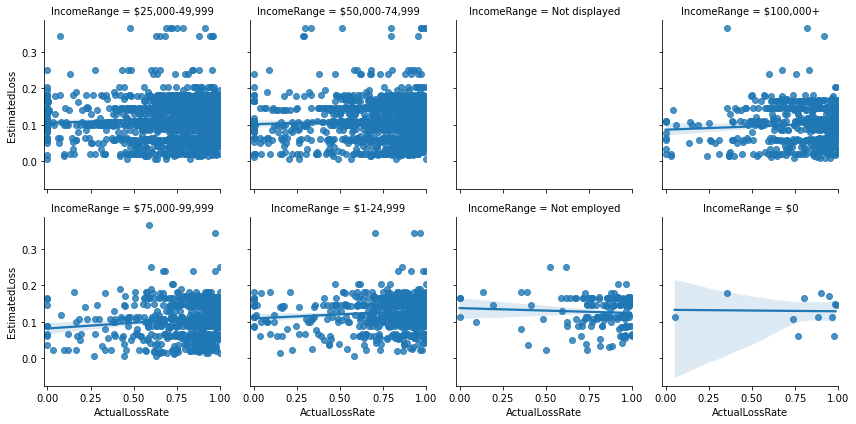

In [59]:
# income range with estimated loss rate and actual loss rate

g = sns.FacetGrid(data = no_one_percenters, col = 'IncomeRange', col_wrap=4, margin_titles=True)
g.map(sns.regplot, 'ActualLossRate', 'EstimatedLoss');


In looking at the Actual Loss Rate for Estimated Loss, it's clear there's no correlation at all. Regardless of the income, the estimated loss had no bearing on the actual loss. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Very little. Prosper Score was the only factor that bore an interesting correlation that could be best seen in a multi-variate analysis comparing against Debt to Income Ratio and Actual Loss Rate. Many other factors that would potentially be relevant turned out not to be relevant at all.

### Were there any interesting or surprising interactions between features?

What could be considered surprising is how irrelevant factors like Debt to Income Ratio or income was to determine someone's ability to pay off loans.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!